In [1]:
from auto_classify import ImgFace
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

# show 12 image with same class

In [2]:
def show_all_image_with_same_class(key: int):
    print(f"Class_key: {key}")
    data: dict[str, list[ImgFace]] = pickle.load(open("out/encoding-dict.pkl", "rb"))
    current_class = data[str(key)]

    plt.figure(figsize=(10,10))  # specifying the overall grid size

    for i, face_data in enumerate(current_class[:12]):
        img = plt.imread(face_data.img_path)
        top, right, bottom, left = face_data.face_location

        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(img, f"class_{key}", (left, top - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)
        # plt.figure(figsize=(2,2))
        # plt.imshow(img)

    plt.axis("off")
    plt.show()

In [3]:
frequent_face_classes: list[tuple[int, int]] = []
with open("out/frequent-face-class-keys.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        splited = line.strip().split(":")
        frequent_face_classes.append((int(splited[0]), int(splited[1])))

number of faces: 117
Class_key: 1


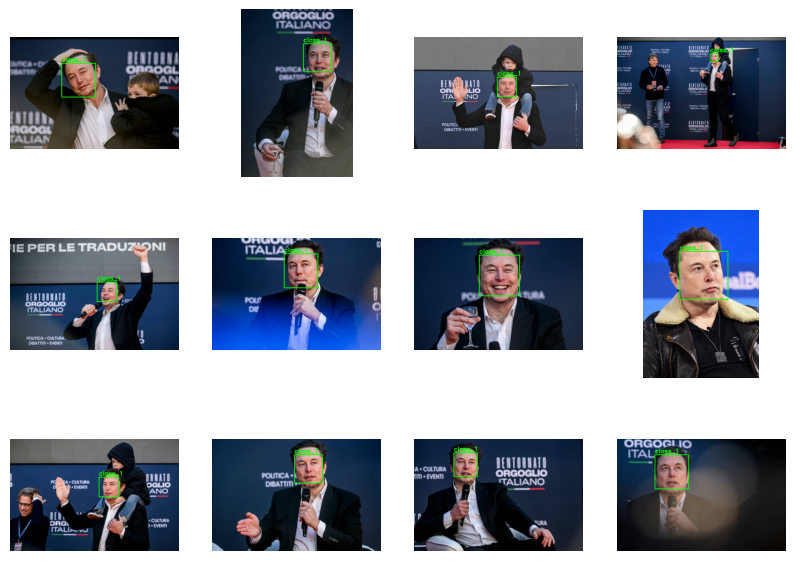

number of faces: 74
Class_key: 12


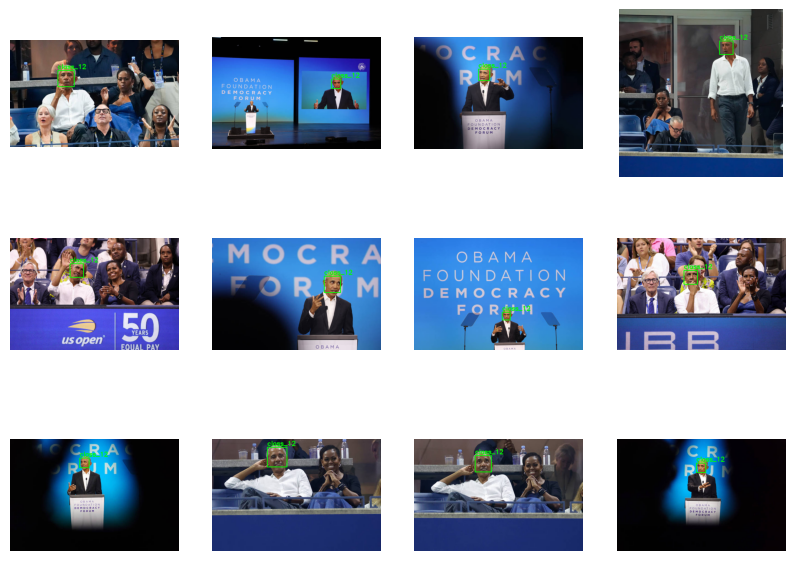

number of faces: 55
Class_key: 37


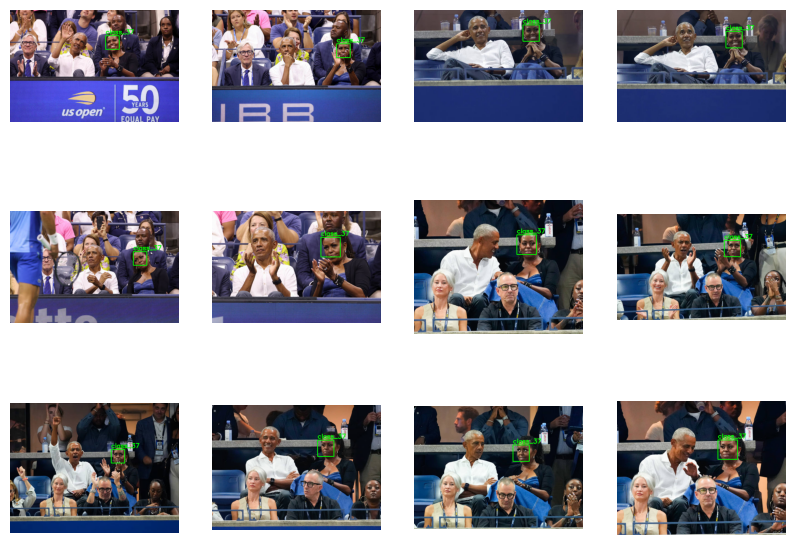

number of faces: 52
Class_key: 27


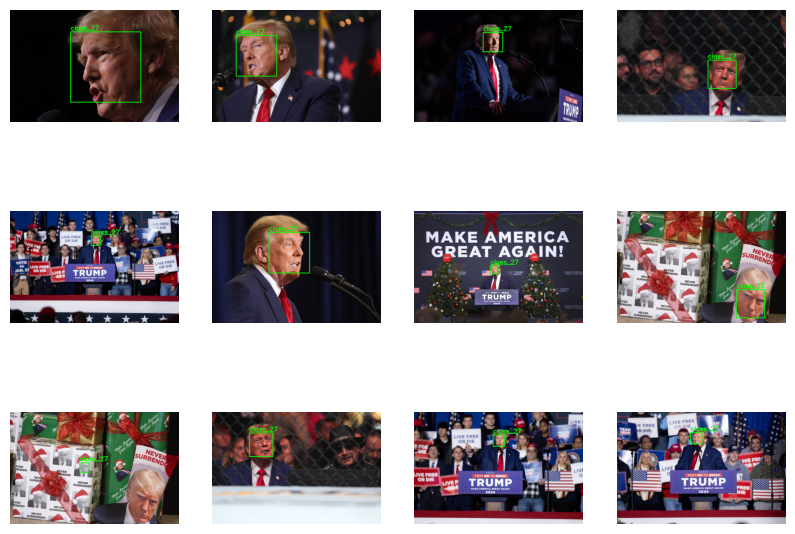

number of faces: 49
Class_key: 0


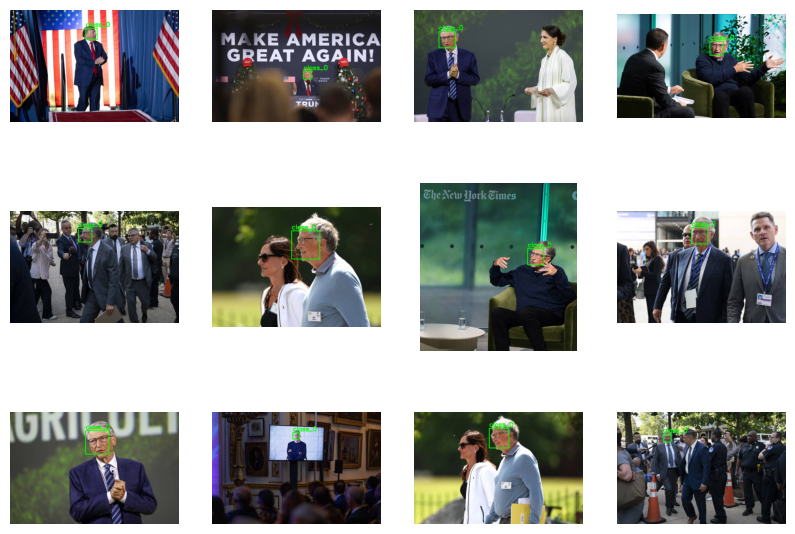

number of faces: 30
Class_key: 14


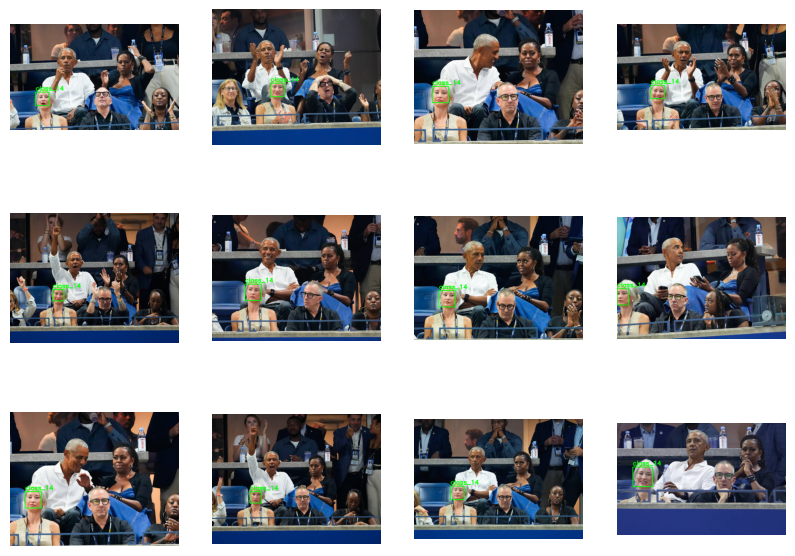

In [4]:
frequent_face_classes.sort(key=lambda x: x[1], reverse=True)
for face_class in frequent_face_classes[:6]:
    print(f"number of faces: {face_class[1]}")
    show_all_image_with_same_class(face_class[0])

In [5]:
def plot_12_images(image_path_list: list[str]):
    plt.figure(figsize=(8,8))  # specifying the overall grid size

    for i, img_path in enumerate(image_path_list[:12]):
        img = plt.imread(img_path)
        plt.subplot(4, 4, i + 1)  # the number of images in the grid is 5*5 (25)
        plt.axis("off")
        plt.imshow(img)

    plt.axis("off")
    plt.show()

# Show Images that no any face detected

No Face Detected: 8


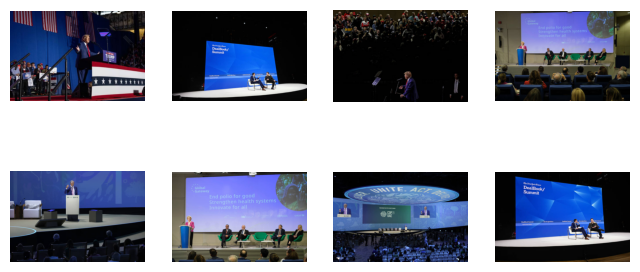

In [6]:
no_face_imgs:list[str] = []
with open('out/no-face.txt', "r") as f:
    lines = f.readlines()
    for line in lines:
        no_face_imgs.append(line.strip().split(":")[0])
print(f"No Face Detected: {len(no_face_imgs)}")
plot_12_images(no_face_imgs)

Single Face: 240


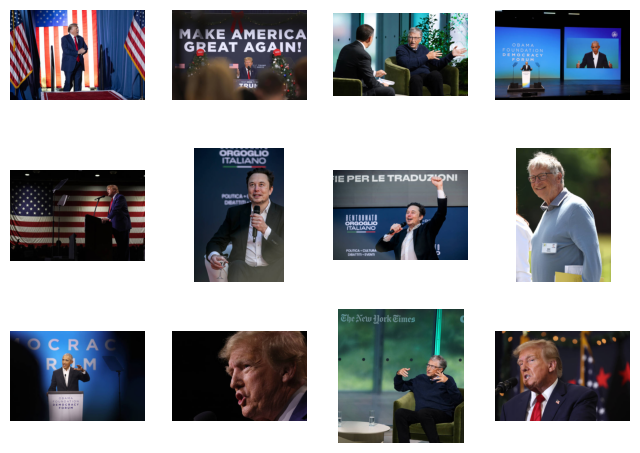

In [7]:
single_face_imgs:list[str] = []
with open('out/single-face.txt', "r") as f:
    lines = f.readlines()
    for line in lines:
        single_face_imgs.append(line.strip())
print(f"Single Face: {len(single_face_imgs)}")
plot_12_images(single_face_imgs)

Multi Face: 201


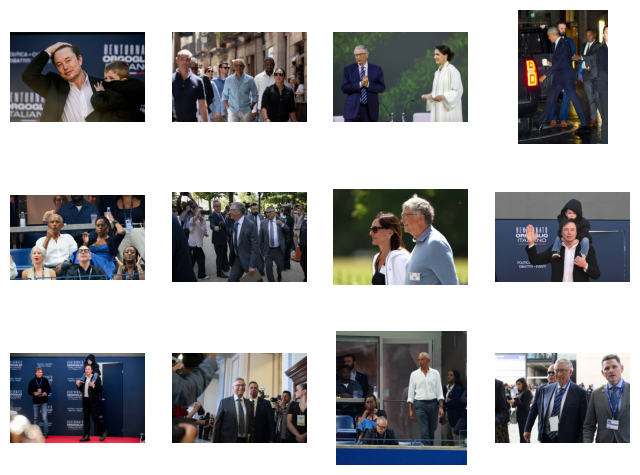

In [8]:
multi_face_imgs:list[str] = []
with open('out/multi-face.txt', "r") as f:
    lines = f.readlines()
    for line in lines:
        multi_face_imgs.append(line.strip())
print(f"Multi Face: {len(multi_face_imgs)}")
plot_12_images(multi_face_imgs)